In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Libraries.**

* **Importing Neccesary Libraries To Perfrom Data Analysis On Netflix.**

In [1]:
# importing libraries

# For numerical and statistical calculations

import numpy as np
import pandas as pd

# For visulizations

import matplotlib.pyplot as plt
import seaborn as sb

import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp

# For fltering warnins

import warnings
warnings.filterwarnings('ignore')

# **Reading the csv file(" Netflix ")**

* **Loading the data**

In [3]:
# Loading the netflix data

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASETS/netflix_titles.csv", parse_dates = ['release_year'])

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Data Understanding**

In [4]:
# Sahpe of the data file

print(" Rows : {} \n columns : {}".format(data.shape[0],data.shape[1]))

 Rows : 8807 
 columns : 12


In [5]:
# information about column names and their respective data types, missing values, and memory consumption 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   object        
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 825.8+ KB


* **We can see multiple missing values in our datafile.**

* **Most of the columns seem to be object type except date time format columns.**

* **Note - There ids no columns related to numbers.**

In [6]:
# Missing values

print(f'Percentahe of missing values = {((data.isnull().sum().sum() / data.size)*100).round(2)}%')

Percentahe of missing values = 4.08%


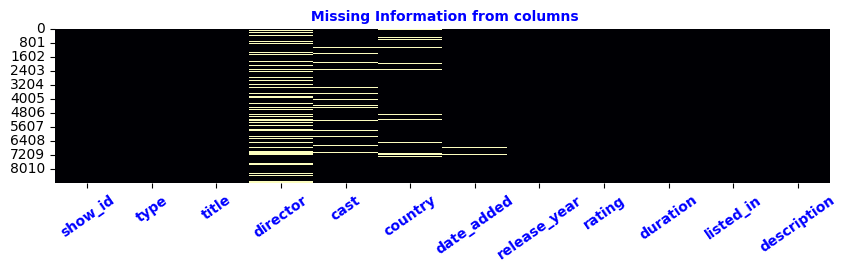

In [ ]:
# Plotting missing values of respective column

plt.figure(figsize = (10, 2))

plt.title(" Missing Information from columns", fontsize = 10, color = 'blue', weight = 'bold')

sb.heatmap(data.isnull(), cmap = 'magma', cbar = False)

plt.xticks(rotation = 35, weight = 'bold', color = 'blue')

plt.show()

* **The total percentage of missing values is 4.08%**

- **Graphical Representation of those missing values**

In [ ]:
# Statistical summary of the data

data.describe(include = ['object', 'number']).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


* **Most of the movies nearly 2800+ handled by netflix are bought from United states**

* **Rajiv Chilaka is a director and David Attenborough is a cast member who has appeared in 19 Netflix-owned movies..**

* **Seems like Netflix have a diverse range of movies for different audience preferences.**

* **Netflix has 3207 contents that are rated as TV-MA.**

* **More than 100+ contents are added in Jan, 1, 2020**



---

# **Data Cleaning**

In [7]:
# Removing show_id column from dataset - all values are unique and not usefull

print(data['show_id'].nunique())

data.drop('show_id', axis = 1, inplace = True)

8807


In [8]:
# ['date_added','rating','duration'] these columns can't be modified without knowing the actual data - dropping rows

data.dropna(subset = ['date_added','rating','duration'], inplace = True)

In [9]:
# updating null rows as unknown

for _ in ['director', 'cast', 'country']: data[_] = data[_].replace(np.nan, 'unknown')

print('Data is Clean from null' if data.isna().sum().sum() == 0 else 'Data needs to be clean')

Data is Clean from null


- **Modifying the year and month columns for easier analysis**

In [10]:
# Creating month cpolum and year columns from date added

data['month_added'] = data['date_added'].apply(lambda x : x.split()[0])

data['year_added'] = data['date_added'].apply(lambda x : x.split()[2])

# Dropping year_added column

data.drop(['date_added', 'description'], axis = 1, inplace = True)

data.head(2) 

,type,title,director,cast,country,release_year,rating,duration,listed_in,month_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2020-01-01,PG-13,90 min,Documentaries,September,2021
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021


In [11]:
# countrycolumn

data['country'].unique()[:5]

array(['United States', 'South Africa', 'unknown', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'],
      dtype=object)

In [12]:
# Extracting first index countries to reduce complexity

data['country'] = data['country'].apply(lambda x : x.split(",")[0])

In [13]:
# Creating two subset one is movies and thwe other is tvshow

Tv_s = data[data['type'] == 'TV Show']

movies = data[data['type'] == 'Movie']

In [18]:
print("Tv-Show : \n Rows  : {} \n columns : {}".format(Tv_s.shape[0],Tv_s.shape[1]))

print("\nMovies : \n Rows : {} \n columns : {}".format(movies.shape[0],movies.shape[1]))

Tv-Show : 
 Rows  : 2664 
 columns : 11

Movies : 
 Rows : 6126 
 columns : 11


In [19]:
# stripping min and converting duration to integer type for movies data

movies['duration'] = movies['duration'].apply(lambda x : int(x.split()[0]))

# grouping duartion to hours for easier analysis

bins = [0, 60, 120, 180, 240, 300, 360]

movies['duration_hr'] = pd.cut(movies['duration'], bins, labels = ['1', '2', '3', '4', '5', '6'])

# dropping duration. title column and cast colum

movies.drop(['duration', 'cast', 'title', 'type', 'director'], axis = 1, inplace = True)

In [20]:
# stripping season and converting duration to integer type for tv shows data

Tv_s['Seasons'] = Tv_s['duration'].apply(lambda x : int(x.split()[0]))

# dropping duration. title column and cast colum

Tv_s.drop(['duration', 'cast', 'title', 'type', 'director'], axis = 1, inplace = True)

# **Data Visulization  -  EDA**

* **Ration between movies and tv shows available in netflix**

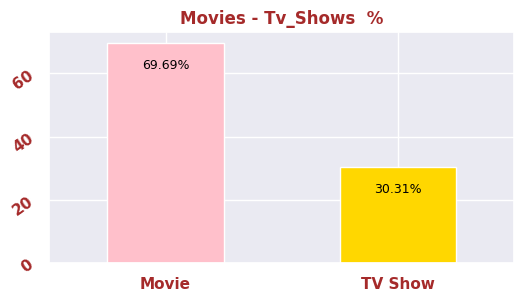

In [21]:
# Ratio of Movies and tv shows availabel in netflis

plt.figure(figsize=(6, 3))

sb.set(style="darkgrid")

colors = ['pink', 'gold', 'green', 'red', 'blue', 'brown', 'orange', 'gray', 'olive', 'cyan']

counts = round(data['type'].value_counts(normalize = True)* 100 , 2)

counts.plot(kind = 'bar', color = colors)

plt.title('Movies - Tv_Shows  %', weight = 'bold', color = 'brown')

plt.xticks(rotation = 0, weight = 'bold', color = 'brown')

plt.yticks(rotation = 35, weight = 'bold', color = 'brown')

for i, v in enumerate(counts):

    plt.text(i, v-8, str(v) + '%', ha = 'center', color = 'black', fontsize = 9)

plt.show()

- **Here we can see netflix is owning __70%__ of movies and remaining __30%__ based on Tv_shows**
- **Netflix's audience is more interested in movies than TV shows.**



---

* **No of Movies released per year by netflix**


In [22]:
# Totla percentage of the movies released over the years

movie_count = movies['year_added'].value_counts().sort_index(ascending = False)

tv_count = Tv_s['year_added'].value_counts().sort_index(ascending = False)

labels, labels_1 = movie_count.index, tv_count.index

values, values_1 = movie_count, tv_count

fig1 = go.Figure(go.Funnel(y = labels, x = values, textposition = "inside", hovertemplate = 'year : %{y}: %{x}'))

fig2 = go.Figure(go.Funnel(y = labels_1, x = values_1, textposition = "inside", hovertemplate = 'year : %{y}: %{x}'))

fig = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ('% of ovies released over the years', '% of Tv_Shows released over the years'))

fig.add_trace(fig1.data[0], row = 1, col = 1)

fig.add_trace(fig2.data[0], row = 1, col = 2)

fig.show()

* **Movies**

    - **The year 2019 surpasses every other year and having a count of 1424 movies released by netflix**
    - **The years btw 2018 - 2020 netflix maintained a release count of above 1200**
    - **And there is a silght sudden fall in year 2021 where netflix released less than 1000**

* **Tv_Shows**

    - **Over the years netflix only released < 600 Tv_shows**
    - **During the year 2019 - 2021 netflix has released large no of tv shows and maintained the count approximately over the years**

* **Conclusions**

    * **The growth of netflix started in year 2015 where netflix showed a small kick start of releasing 56 movies and 26 tv_shows**

    * **In the year netflix released almost 4X higher movies from the previous year and 6X higher tv_shows than the tv_shows released in previous years**

    * **And netfix continued his growth by producing more number of movies but in tv_shows the growth is not like movies released**

    * **Over all the years the movies(approx := 1000+) content released is more than the tv_shows(approx := 500+)**



---
* **Top 10 Movies and Tv_shows - countries**


In [24]:
# Top 10 Movies and Tv_shows produced by countries over the years to netflix

mov_cou = movies['country'].value_counts()[:10].sort_values(ascending = True)

tv_cou = Tv_s['country'].value_counts()[:10].sort_values(ascending = True)

fig1 = px.bar(mov_cou, x = mov_cou.values, y = mov_cou.index)

fig2 = px.bar(tv_cou, x = tv_cou.values, y = tv_cou.index)

fig = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ('Movies released by country - Top(10)', 'Tv_shows released by country - Top(10)'))

fig.add_trace(fig1.data[0], row = 1, col = 1)

fig.add_trace(fig2.data[0], row = 1, col = 2)

fig.update_layout(
    title = 'Movies and Tv_shows produced by countries - (Top 10)',
    yaxis_title = 'Country',
    yaxis = dict(categoryorder = 'total ascending'))

fig.update_traces(texttemplate = '%{x}', textposition = 'inside')

fig.show()

- **Netflix buys most of the movies and tv_shows produced by USA, Which his 2X the movies released by india**

* **Most of the movies and tv_shows are not known and which coountry has released it's not known**

**Movies Count released overed the months by years**

In [25]:
# Plotting count of movies over the months by years

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

temp = data.groupby('year_added')['month_added'].value_counts().unstack().sort_index().fillna(0)[month_order]

fig = px.area(temp, color = 'month_added',title = 'Count of movies/tv shows added over time')

fig.update_traces(textposition = 'top center', mode = 'lines+markers+text')

fig.update_layout(width = 1000, height = 500,  plot_bgcolor = 'white',  paper_bgcolor = 'pink')

fig.show()

- **Netflix release more no of movies and tv shows from all the yaers is __Nov'2019 and July 2021__**
- **very few amount of tv shows and movies released between years 2008 - 2015** 



---
* **Movies and tvshows released over the year by netflix**



In [26]:
#Movies and tvshows released over the year by netflix

fig = px.scatter(data, x = "release_year", y = data.index, color = data['type'], title = "Movies, Tv_shows - over the years")

fig.update_layout(width = 1000, height = 400,  plot_bgcolor = 'white',  paper_bgcolor = 'pink')

fig.show()

In [27]:
from plotly.subplots import make_subplots

mov_count = movies['rating'].value_counts()

tv_count = Tv_s['rating'].value_counts()

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Rating_Category - Movie Counts', 'Rating_Category - Tv_shows Counts'))

fig.add_trace(go.Bar(x = mov_count.index, y = mov_count.values, name = 'Movies'), row = 1, col = 1)

fig.add_trace(go.Bar(x = tv_count.index, y = tv_count.values, name = 'TV shows'), row = 1, col = 2)

fig.update_layout(height = 400, width = 1500, title_text = 'Count of movies/tv shows by rating', showlegend = False)

fig.update_traces(texttemplate = '%{y}', textposition = 'inside')

fig.show()

# **Recommendations**

**More original content :**

* **Netflix can focus on creating more original and new contents to be unique from its competitors.**

**User Interface :** 

* **Netflix could improve its user interface by making it more user-friendly and personalized. Using data analytics and machine learning, Netflix can suggest content based on your viewing history, age and preferences.**

**Expand internationally :** 

* **Netflix can expand its presence to other countries that are not yet available. This helps netflix to enter new markets and attract new subscribers.**

**About pricing there is nothing to recommend because the data hast not any content related to pricing**